In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import colors
from scipy.stats import pearsonr, zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model


In [2]:
# Cargar los datos de propiedades
ruta = 'https://raw.githubusercontent.com/rasief/cartografia/master/melb_data.csv'
df = pd.read_csv(ruta)

In [3]:
# Filtrar columnas numéricas
df = df.select_dtypes(exclude=['object'])

In [4]:
# Borrado de datos nulos
df = df.dropna()

In [5]:
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
6,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,210.0,1910.0,-37.80240,144.99930,4019.0
7,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,107.0,1890.0,-37.80600,144.99540,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13572,2,650000.0,14.5,3087.0,2.0,1.0,1.0,210.0,79.0,2006.0,-37.70657,145.07878,2329.0
13573,4,635000.0,14.7,3030.0,4.0,2.0,1.0,662.0,172.0,1980.0,-37.89327,144.64789,16166.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


# BuildingArea

Text(0.5, 1.0, 'Distribución de precio y área construida')

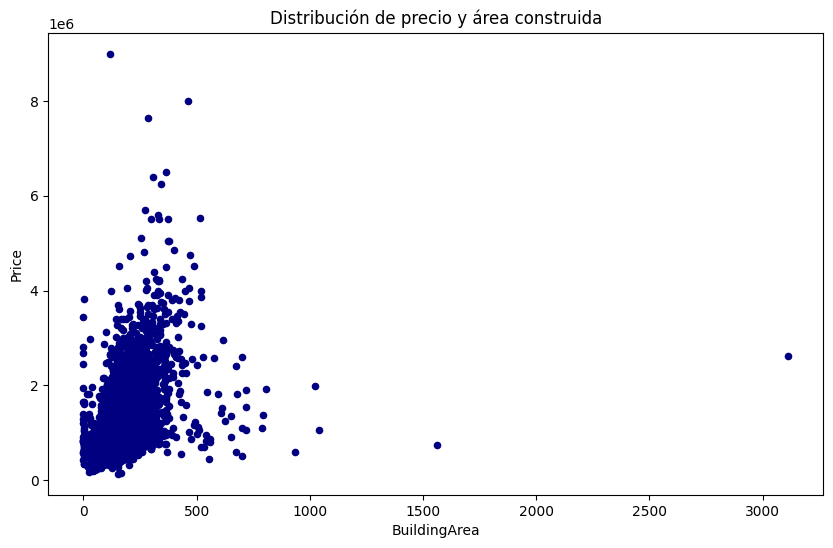

In [6]:
# Diagrama de distribución inicial
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x='BuildingArea', y='Price', c='navy', kind='scatter', ax=ax)
ax.set_title('Distribución de precio y área construida')

In [7]:
# Filtrar datos por desviaciones estándar
df = df[(np.abs(zscore(df['BuildingArea'])) <= 3)]
df = df[df["BuildingArea"] >= 0]

Text(0.5, 1.0, 'Distribución de precio y área construida después del filtrado')

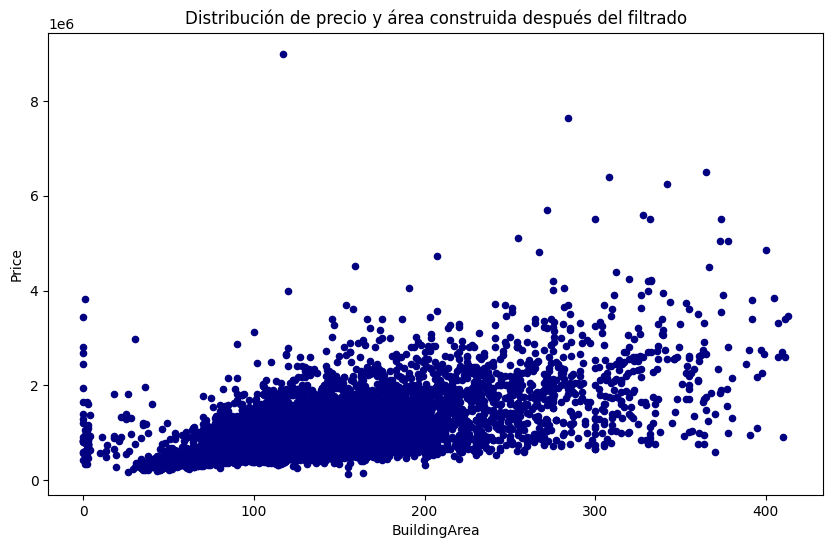

In [8]:
# Diagrama de distribución después de filtrar
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x='BuildingArea', y='Price', c='navy', kind='scatter', ax=ax)
ax.set_title('Distribución de precio y área construida después del filtrado')

# Bedroom2

Text(0.5, 1.0, 'Distribución de precio y Bedroom2')

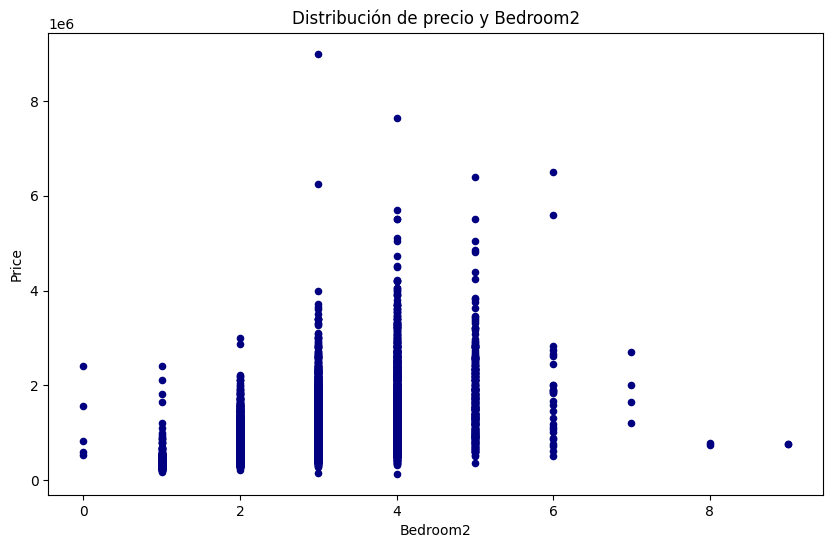

In [9]:
# Diagrama de distribución de Bedroom2 antes del filtrado
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x='Bedroom2', y='Price', c='navy', kind='scatter', ax=ax)
ax.set_title('Distribución de precio y Bedroom2')

In [10]:
# Filtrar datos por desviaciones estándar en Bedroom2
df = df[(np.abs(zscore(df['Bedroom2'])) <= 3)]
df = df[df["Bedroom2"] >= 0]

Text(0.5, 1.0, 'Distribución de precio y Bedroom2 después del filtrado')

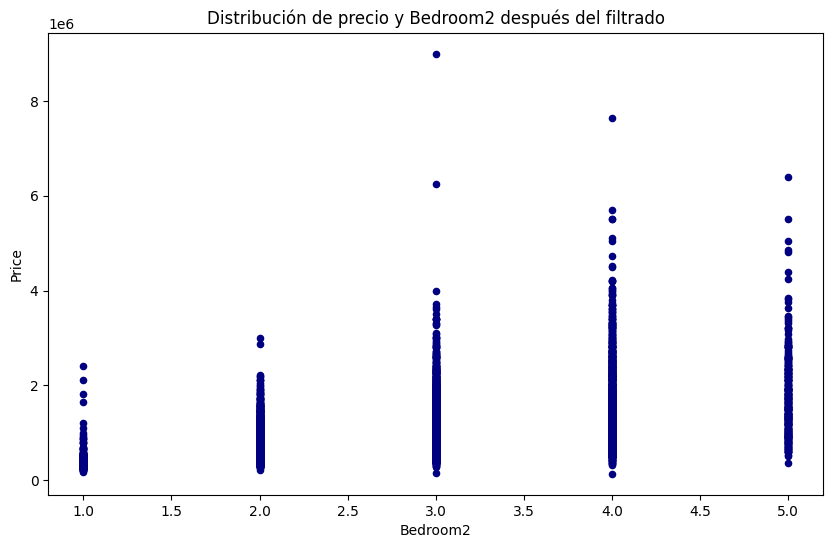

In [11]:
# Diagrama de distribución de Bedroom2 después del filtrado
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x='Bedroom2', y='Price', c='navy', kind='scatter', ax=ax)
ax.set_title('Distribución de precio y Bedroom2 después del filtrado')

# Bathroom

Text(0.5, 1.0, 'Distribución de precio y Bathroom')

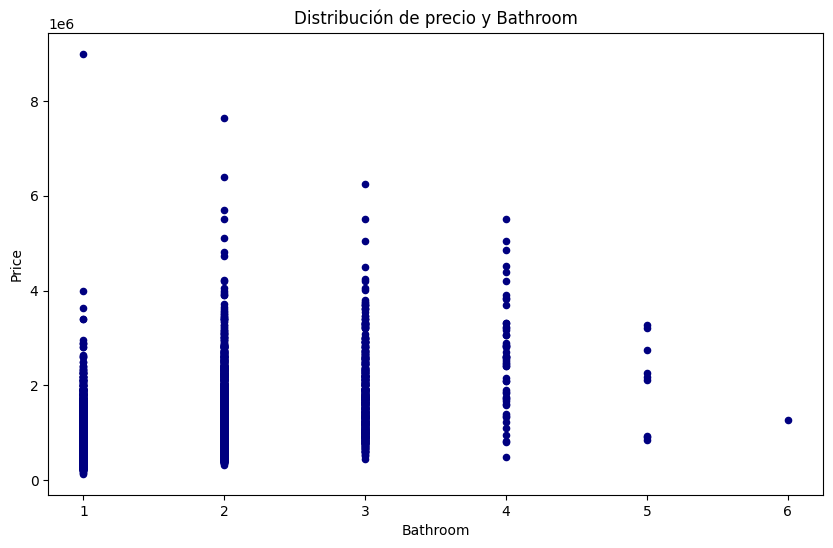

In [12]:
# Diagrama de distribución de Bathroom antes del filtrado
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x='Bathroom', y='Price', c='navy', kind='scatter', ax=ax)
ax.set_title('Distribución de precio y Bathroom')

In [13]:
# Filtrar datos por desviaciones estándar en Bathroom
df = df[(np.abs(zscore(df['Bathroom'])) <= 3)]
df = df[df["Bathroom"] >= 0]

Text(0.5, 1.0, 'Distribución de precio y Bathroom después del filtrado')

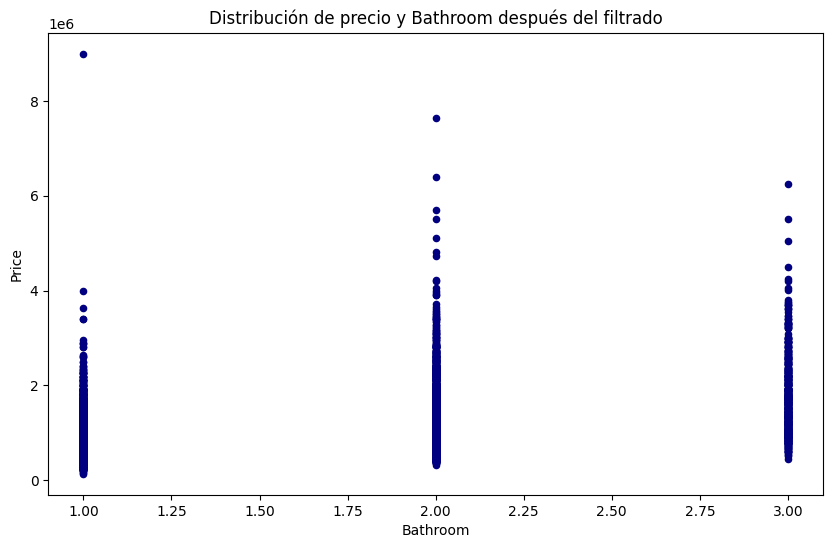

In [14]:

# Diagrama de distribución de Bathroom después del filtrado
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(x='Bathroom', y='Price', c='navy', kind='scatter', ax=ax)
ax.set_title('Distribución de precio y Bathroom después del filtrado')

In [17]:
# Tratamiento de Valores Atípicos Avanzado
from sklearn.ensemble import IsolationForest

# Selecciona las columnas de interés para el IsolationForest
columns_of_interest = ['BuildingArea', 'Bedroom2', 'Bathroom']

outlier_detector = IsolationForest(contamination=0.05)
outliers = outlier_detector.fit_predict(df[columns_of_interest])
df = df[outliers == 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['BuildingArea', 'Bedroom2', 'Bathroom']]), columns=['BuildingArea_scaled', 'Bedroom2_scaled', 'Bathroom_scaled'])
df = pd.concat([df, df_scaled], axis=1)

In [25]:
# Correlación entre variables Bedroom2, Bathroom y BuildingArea con Price
bedroom2_column = df['Bedroom2']
bathroom_column = df['Bathroom']
building_area_column = df['BuildingArea']

# Filtrar NaNs y infinitos en las columnas
valid_indices = np.isfinite(bedroom2_column) & np.isfinite(bathroom_column) & np.isfinite(building_area_column) & np.isfinite(price_column)
bedroom2_valid = bedroom2_column[valid_indices]
bathroom_valid = bathroom_column[valid_indices]
building_area_valid = building_area_column[valid_indices]
price_valid = price_column[valid_indices]

# Calcular las correlaciones
corr_bedroom = pearsonr(x=bedroom2_valid, y=price_valid)
corr_bathroom = pearsonr(x=bathroom_valid, y=price_valid)
corr_building = pearsonr(x=building_area_valid, y=price_valid)

# Mostrar los resultados
print("Coeficiente de correlación de Pearson (Bedroom2):", corr_bedroom[0])
print("P-value (Bedroom2):", corr_bedroom[1])

print("Coeficiente de correlación de Pearson (Bathroom):", corr_bathroom[0])
print("P-value (Bathroom):", corr_bathroom[1])

print("Coeficiente de correlación de Pearson (BuildingArea):", corr_building[0])
print("P-value (BuildingArea):", corr_building[1])



Coeficiente de correlación de Pearson (Bedroom2): 0.43296696592550526
P-value (Bedroom2): 1.2111856645802653e-259
Coeficiente de correlación de Pearson (Bathroom): 0.32801321230093117
P-value (Bathroom): 2.5961651001074594e-143
Coeficiente de correlación de Pearson (BuildingArea): 0.5564289539179915
P-value (BuildingArea): 0.0
